# House Price Prediction Regresssion Project

## Project Goal



##### Predict the price of a house by its features.If you are a buyer or seller of the house but you dont know the exact price of the house,so supervised machine learning regression algorithms can help you to predict the price of house just providing features of the target house

## Load Libraries

In [1]:
## import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load Dataset

In [2]:
## import the dataset
data = pd.read_csv("mldm and app data.csv")

In [3]:
## check the first 5 rows of the dataset.
data.head()

,Area,BHK,Bathroom,Parking,Furnishing,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,1.0,Semi-Furnished,New_Property,Builder_Floor,NaN,6500000
1,750.0,2,2.0,1.0,Semi-Furnished,New_Property,Apartment,6667.0,5000000
2,950.0,2,2.0,1.0,Furnished,Resale,Apartment,6667.0,15500000
3,600.0,2,2.0,1.0,Semi-Furnished,Resale,Builder_Floor,6667.0,4200000
4,650.0,2,2.0,1.0,Semi-Furnished,New_Property,Builder_Floor,6667.0,6200000


In [4]:
type(data) ## check the datatype of dataset.

pandas.core.frame.DataFrame

In [5]:
## info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Parking      1226 non-null   float64
 4   Furnishing   1254 non-null   object 
 5   Transaction  1259 non-null   object 
 6   Type         1254 non-null   object 
 7   Per_Sqft     1018 non-null   float64
 8   Price        1259 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 88.6+ KB


In [6]:
data.shape ## shows the rows and columns of dataset.

(1259, 9)

In [7]:
x = data.iloc[:,0:8].values #independent variable
print(x)

[[800.0 3 2.0 ... 'New_Property' 'Builder_Floor' nan]
 [750.0 2 2.0 ... 'New_Property' 'Apartment' 6667.0]
 [950.0 2 2.0 ... 'Resale' 'Apartment' 6667.0]
 ...
 [875.0 3 3.0 ... 'New_Property' 'Builder_Floor' 12916.0]
 [990.0 2 2.0 ... 'Resale' 'Builder_Floor' 12916.0]
 [11050.0 3 3.0 ... 'New_Property' 'Builder_Floor' 12916.0]]


In [8]:
y = data.iloc[:,8:9].values #dependent variable
print(y)

[[ 6500000]
 [ 5000000]
 [15500000]
 ...
 [17500000]
 [11500000]
 [18500000]]


In [9]:
## to check the presence of missing values.
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Parking         33
Furnishing       5
Transaction      0
Type             5
Per_Sqft       241
Price            0
dtype: int64

## Handling Missing Values

In [10]:
## handling missing values with sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer() # create the object of Sim Imputer

x[:,2:3]=imputer.fit_transform(x[:, 2:3]) # apply to bathroom column.
x[:,3:4]=imputer.fit_transform(x[:, 3:4]) # apply to parking column.
x[:,7:8]=imputer.fit_transform(x[:, 7:8]) # apply to per_sqft column.


In [11]:
## Delete the missing observations.
data.dropna(axis=0,inplace=True)

In [12]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Parking        0
Furnishing     0
Transaction    0
Type           0
Per_Sqft       0
Price          0
dtype: int64

In [13]:
# Handling the categorical data

# Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()   # create object of LabelEncoder()
x[:,4]=le.fit_transform(x[:,4])  #apply fit_transform to Furnishing column.
x[:,5]=le.fit_transform(x[:,5]) #apply fit_transform to Transaction column.
x[:,6]=le.fit_transform(x[:,6]) #apply fit_transform to type column.
print(x[:,4])
print(x[:,5])
print(x[:,6])

[1 1 0 ... 1 2 2]
[0 0 1 ... 0 1 0]
[1 0 0 ... 1 1 1]


In [14]:
# oneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()  #create object of OnehotEncoder()
ctc = ColumnTransformer([("Furnishing", ohe, [4])], remainder="passthrough")  #apply one hot encoding on Furnishing column.
x = ctc.fit_transform(x)
print(x)

[[0.0 1.0 0.0 ... 0 1 15690.136542239685]
 [0.0 1.0 0.0 ... 0 0 6667.0]
 [1.0 0.0 0.0 ... 1 0 6667.0]
 ...
 [0.0 1.0 0.0 ... 0 1 12916.0]
 [0.0 0.0 1.0 ... 1 1 12916.0]
 [0.0 0.0 1.0 ... 0 1 12916.0]]


In [15]:
## Avoiding the dummy variable trap for Furnishnig column.

x=x[:,1:]
print(x)

[[1.0 0.0 0.0 ... 0 1 15690.136542239685]
 [1.0 0.0 0.0 ... 0 0 6667.0]
 [0.0 0.0 0.0 ... 1 0 6667.0]
 ...
 [1.0 0.0 0.0 ... 0 1 12916.0]
 [0.0 1.0 0.0 ... 1 1 12916.0]
 [0.0 1.0 0.0 ... 0 1 12916.0]]


In [16]:
## Splitting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [17]:
X_train

array([[1.0, 0.0, 0.0, ..., 1, 1, 4000.0],
       [1.0, 0.0, 0.0, ..., 1, 1, 8421.0],
       [1.0, 0.0, 0.0, ..., 1, 1, 6944.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 1, 18055.0],
       [1.0, 0.0, 0.0, ..., 0, 1, 18000.0],
       [1.0, 0.0, 0.0, ..., 1, 0, 20967.0]], dtype=object)

In [18]:
## Length of X_train data(i.e. 80%)
len(X_train)

1007

In [19]:
## Length of X_test data(i.e. 20%)
len(X_test)

252

In [20]:
## Feature Scaling(Standardization)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train=st.fit_transform(X_train)
print(X_train)

X_test=st.transform(X_test)
print(X_test)

[[ 0.87736625 -0.63597409 -0.0631509  ...  0.78840224  0.91728036
  -0.61145773]
 [ 0.87736625 -0.63597409 -0.0631509  ...  0.78840224  0.91728036
  -0.38248501]
 [ 0.87736625 -0.63597409 -0.0631509  ...  0.78840224  0.91728036
  -0.45898189]
 ...
 [-1.13977487  1.57239111 -0.0631509  ... -1.26838807  0.91728036
   0.11647973]
 [ 0.87736625 -0.63597409 -0.0631509  ... -1.26838807  0.91728036
   0.11363117]
 [ 0.87736625 -0.63597409 -0.0631509  ...  0.78840224 -1.05644042
   0.26729822]]
[[ 0.87736625 -0.63597409 -0.0631509  ... -1.26838807  0.91728036
  -0.47332829]
 [-1.13977487 -0.63597409 -0.0631509  ... -1.26838807  0.91728036
   0.33229726]
 [-1.13977487  1.57239111 -0.0631509  ... -1.26838807  0.91728036
   0.32079942]
 ...
 [ 0.87736625 -0.63597409 -0.0631509  ... -1.26838807  0.91728036
  -0.47762703]
 [-1.13977487  1.57239111 -0.0631509  ... -1.26838807 -1.05644042
  -0.63611075]
 [-1.13977487  1.57239111 -0.0631509  ...  0.78840224 -1.05644042
  -0.02185687]]


In [21]:
 ## Graphs using matplotlib:

x_values=data["BHK"]
y_values=data["Price"]

Text(0.5, 1.0, 'BHK vs Price of Houses')

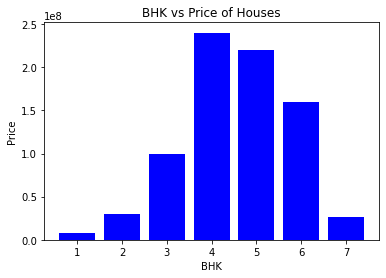

In [22]:
## bar plot
plt.bar(x_values,y_values, color="blue")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.title("BHK vs Price of Houses")

#### This graph is showing that price of 4BHK is highest.

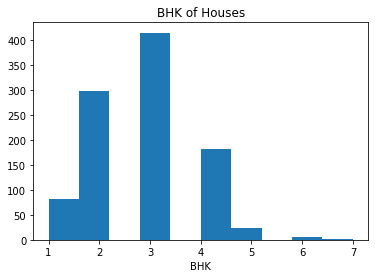

In [23]:
## Histogram 
x_values=data["BHK"]
plt.hist(x_values, bins=10)
plt.xlabel("BHK")
plt.title("BHK of Houses")
plt.show()

#### This graph shows 3BHK is Higher in number.

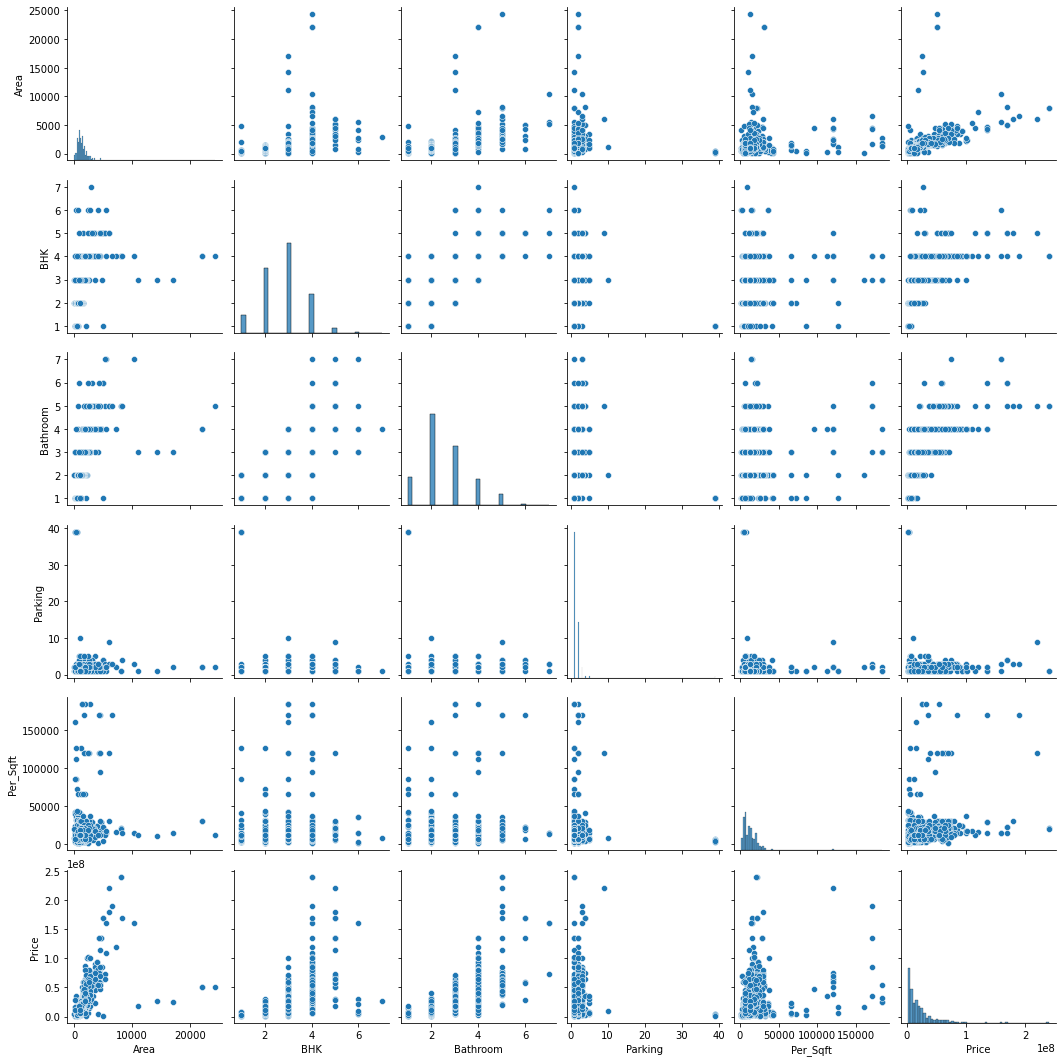

In [24]:
# pair plot
sns.pairplot(data)

<AxesSubplot:xlabel='Price', ylabel='Density'>

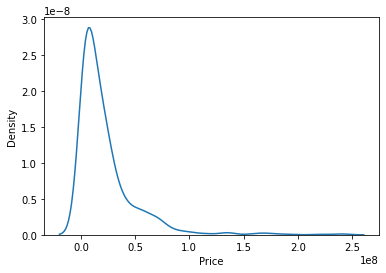

In [25]:
## kde plot
sns.kdeplot(data['Price'])

<AxesSubplot:xlabel='Area', ylabel='Price'>

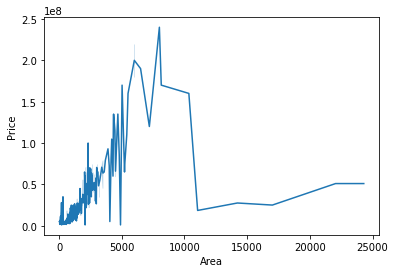

In [26]:
# line plot
sns.lineplot(x='Area', y='Price', data=data)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

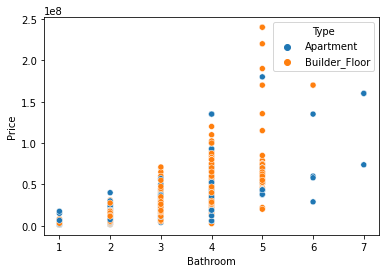

In [27]:
## Scatter plot
sns.scatterplot(x="Bathroom",y="Price", data=data, hue="Type")

<AxesSubplot:xlabel='Type', ylabel='Price'>

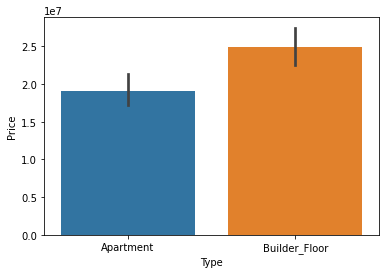

In [28]:
sns.barplot(x="Type",y="Price",data=data)

#### This graph shows Builder_Floor Price is higher than the Apartment.

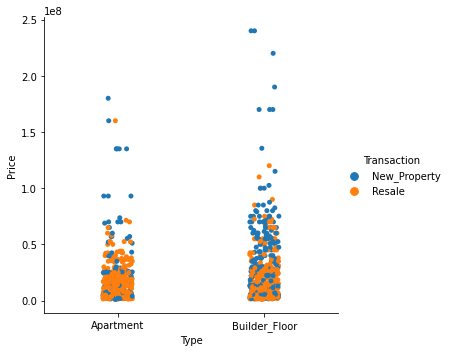

In [29]:
## Categorical plot
sns.catplot(x="Type",y="Price",data=data, hue="Transaction")

<AxesSubplot:xlabel='Furnishing', ylabel='count'>

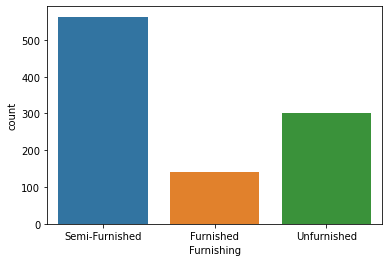

In [30]:
sns.countplot(x="Furnishing",data=data)

#### The graph shows High number of Semi-Furnished as compared  to Furnished and Unfurnished. 

## Model Building

In [31]:
## model creation using  Multiple Linear Regression

from sklearn.linear_model import LinearRegression
MLR = LinearRegression()

## fitting the training data 
MLR.fit(X_train,Y_train)

LinearRegression()

In [32]:
## Coffecients
MLR.coef_

array([[ -136761.91668741,   744345.04938963,  -180636.09110584,
         7370128.08885559,   117596.16959127, 14206363.02720479,
          493533.13321481, -2238593.17417049,  -228672.60979077,
         4070116.50672504]])

In [33]:
## intercept
MLR.intercept_

array([21744240.31777558])

In [34]:
## Prediction: test the model(test data)

Y_pred = MLR.predict(X_test)
Y_pred

array([[ 2.68124085e+07],
       [ 6.51767306e+07],
       [ 3.33741512e+07],
       [ 2.45670212e+07],
       [ 2.90133904e+07],
       [ 2.17094068e+07],
       [-3.05479521e+06],
       [ 2.18615151e+07],
       [-8.88215449e+06],
       [ 3.17827843e+07],
       [ 1.01686053e+07],
       [ 4.56746343e+07],
       [ 8.74173443e+06],
       [ 1.17119348e+07],
       [ 1.04648531e+07],
       [ 2.19694608e+07],
       [ 5.83364589e+07],
       [ 1.13478317e+07],
       [ 8.97492661e+06],
       [ 2.46240004e+07],
       [ 3.02842703e+07],
       [ 2.82879314e+07],
       [ 2.57762729e+07],
       [ 3.68221316e+07],
       [ 2.57762729e+07],
       [ 5.88064364e+07],
       [ 1.41694628e+07],
       [ 6.11466071e+07],
       [ 1.24731655e+07],
       [-6.75074411e+06],
       [-9.76380165e+06],
       [ 1.94238363e+07],
       [ 1.10649187e+07],
       [ 8.20702196e+06],
       [ 5.34470043e+07],
       [-7.07133346e+06],
       [ 2.60689776e+07],
       [ 1.21444550e+07],
       [ 5.8

## Model Evaluation

In [35]:
##evaluation:

import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("r2_score", r2_score(Y_test, Y_pred)*100)
print("mean_squared_error", mean_squared_error(Y_test, Y_pred))
print("mean_absoulte_error", mean_absolute_error(Y_test, Y_pred))
print('RMSE is--->',math.sqrt(mean_squared_error(Y_test, Y_pred)))

r2_score 57.94578998741314
mean_squared_error 170533965887017.9
mean_absoulte_error 8382491.608485347
RMSE is---> 13058865.413465977


### Decision Tree model

In [36]:
## Decision Tree model 

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)

## train the regressor on training data
DTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
## predict the responce for test dataset

Y_pred = DTR.predict(X_test)
Y_pred

array([1.13000000e+07, 7.50000000e+07, 1.74000000e+07, 1.50000000e+07,
       1.35000000e+07, 1.55000000e+07, 1.85000000e+06, 2.20000000e+07,
       3.50000000e+06, 4.00000000e+07, 7.50000000e+06, 3.65000000e+07,
       6.50000000e+06, 1.58000000e+07, 1.33500000e+07, 6.00000000e+06,
       6.25000000e+07, 1.65000000e+07, 3.70000000e+06, 1.40000000e+07,
       5.00000000e+07, 1.95000000e+07, 2.00000000e+07, 6.00000000e+07,
       2.00000000e+07, 8.50000000e+07, 1.30000000e+07, 5.50000000e+07,
       1.58000000e+07, 1.90000000e+06, 1.50000000e+06, 2.40000000e+06,
       1.80000000e+07, 8.91000000e+06, 6.50000000e+07, 8.00000000e+06,
       4.40000000e+06, 1.32000000e+07, 8.50000000e+07, 4.70000000e+06,
       4.30000000e+07, 1.24000000e+07, 2.00000000e+07, 2.40000000e+07,
       1.80000000e+06, 5.00000000e+06, 3.50000000e+06, 1.60000000e+06,
       1.03000000e+07, 7.20000000e+06, 1.45000000e+07, 7.50000000e+07,
       2.15000000e+07, 4.00000000e+07, 1.36000000e+07, 6.00000000e+06,
      

## Model Evaluation

In [38]:
## evaluation : 
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("r2_score", r2_score(Y_test, Y_pred)*100)
print("mean_squared_error", mean_squared_error(Y_test, Y_pred))
print("mean_absoulte_error", mean_absolute_error(Y_test, Y_pred))
print('RMSE is--->',math.sqrt(mean_squared_error(Y_test, Y_pred)))

r2_score 70.46858620103686
mean_squared_error 119752793165784.83
mean_absoulte_error 5911812.16931217
RMSE is---> 10943161.93637766
